In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

## DESCRIZIONE del PROBLEMA 
Il dataset in analisi contiene informazioni riguardanti le statiche per giorno, dall'anno 2008 fino al 2018, e per locazione, cioè nello stato australiano. 
L'obbiettivo del dataset è predirre se il giorno successivo pioverà.
Questo viene fatto nella colonna 'RainTomorrow'.

In [3]:
dataset = pd.read_csv('weatherAUS.csv')

In [4]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
dataset['Date']= pd.to_datetime(dataset["Date"])
#Creazione della colonna year 
dataset['year'] = dataset.Date.dt.year

Le Features del dataset sono le seguenti, visibili nella tabella del dataset:
1. Date: il giorno del mese della predizione.
2. Location: la città di analisi. 
3. MinTemp: temperatura più bassa per giornata in gradi.
4. MaxTemp: temperatura più alta per giornata in gradi.
5. RainFall: la quantità di precipitazioni registrate per la giornata in mm.
6. Evaporation: la cosiddetta evaporazione in padella di Classe A (mm) nelle 24 ore alle 9 del mattino.
7. Sunshine: il numero di ore di sole nel corso della giornata.
8. WindGustDir: la direzione della raffica di vento più forte nelle 24 ore fino a mezzanotte.
9. WindGustSpeed: la velocità (km/h) della raffica di vento più forte nelle 24 ore fino a mezzanotte.
10. WindDir9am: direzione del vento alle 9am. 
11. WindDir3pm: direzione del vento alle 3pm. 
12. WindSpeed9am: velocità media del vento in 10 minuti 9am.
13. WindSpeed3pm: velocità media del vento in 10 minuti 3pm.
14. Humidity9am: umidità (percentuale) alle 9am.
15. Humidity3pm: umidità (percentuale) alle 3pm.
16. Pressure9am: pressione atmosferica (hpa) a livello del mare alle 9am.
17. Pressure3pm: pressione atmosferica (hpa) a livello del mare alle 3pm.
18. Cloud9am: porzione di cielo nuvoloso alle 9am (in "oktas": eighths).
19. Cloud3pm: porzione di cielo nuvoloso alle 3pm (in "oktas": eighths).
20. Temp9am: Temperatura (gradi C) alle 9am.
21. Temp3pm: Temperatura (gradi C) alle 3pm.
22. RainToday: variabile categorica che determina se ha piovuto il giorno stesso.
23. RainTomorrow: variabile categorica che determina se pioverà il giorno successivo.

La variabile da predirre è: 
'RainTomorrow', che definisce se domani pioverà, in particolare la definiremo come varibile discreta binaria.

Le varibili delle feature sono: 
1. Numeriche: 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'. 
2. Categoriche: 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'.

id identifica univocamente i record del dataset, ma non avendo alcuna importanza ai fini della predizione, si procede a sostituire l'indice del dataframe pandas con  la colonna 'Date'.

In [6]:
dataset.set_index('Date',inplace=True)
dataset.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008


Ora analiziamo le statistiche per ogni feature.

In [7]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2012.769751
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,2.537684
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,2007.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,2011.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,2015.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,2017.000000


Dalla tabella soprastante possiamo notare la presenza di valori nulli, sopratutto in corrispondenza della colonna Sunshine, Evaporation, Could9am e Could3pm. 

## Data Preprocessing

Osserviamo la tipologia delle varibili del nostro dataset:


In [8]:
cat = (dataset.dtypes == "object")
object_cols = list(cat[cat].index)

print("Variabili Categoriche:")
print(object_cols)

Variabili Categoriche:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [9]:
num = (dataset.dtypes == "float64")
num_cols = list(num[num].index)

print("Variabili Numeriche:")
print(num_cols)

Variabili Numeriche:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


Ricerchiamo i valori Nan e li sostituiamo con '0' nelle variabili numeriche, mentre in quelle categoriche mettiamo la media, così da non avere problemi con essi nello studio dei dati.

In [10]:
for i in object_cols:
    dataset[i].fillna(dataset[i].mode()[0], inplace=True)

for i in num_cols:
    dataset[i].fillna(0, inplace=True)

Utilizziamo LabelEncoder che ci permette di enumerare le label delle varibili categoriche: 

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in object_cols:
    dataset[i] = label_encoder.fit_transform(dataset[i])

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145460 entries, 2008-12-01 to 2017-06-25
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int64  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int64  
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int64  
 9   WindDir3pm     145460 non-null  int64  
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm     

In [13]:
dataset.head(120)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,2,13.4,22.9,0.6,0.0,0.0,13,44.0,13,14,...,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,2008
2008-12-02,2,7.4,25.1,0.0,0.0,0.0,14,44.0,6,15,...,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0,0,2008
2008-12-03,2,12.9,25.7,0.0,0.0,0.0,15,46.0,13,15,...,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0,0,2008
2008-12-04,2,9.2,28.0,0.0,0.0,0.0,4,24.0,9,0,...,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0,0,2008
2008-12-05,2,17.5,32.3,1.0,0.0,0.0,13,41.0,1,7,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-03-26,2,13.3,29.8,1.8,0.0,0.0,15,33.0,3,14,...,26.0,1019.1,1017.2,0.0,6.0,16.2,29.2,1,0,2009
2009-03-27,2,10.1,27.6,0.0,0.0,0.0,14,43.0,3,13,...,30.0,1023.0,1020.7,0.0,0.0,16.5,26.8,0,0,2009
2009-03-28,2,9.1,28.9,0.0,0.0,0.0,6,24.0,3,3,...,26.0,1023.8,1020.6,0.0,0.0,14.0,27.7,0,0,2009


## Data Exploring

Ora analiziamo i dati attraverso i grafici, dopo averli raggruppati per anno:

In [14]:
gb = dataset.groupby('year')
print("Tipo gb :",type(gb))
gb.describe()

Tipo gb : <class 'pandas.core.groupby.generic.DataFrameGroupBy'>


Location                                                     MinTemp  \
        count       mean        std  min   25%   50%   75%   max    count   
year                                                                        
2007     61.0   9.000000   0.000000  9.0   9.0   9.0   9.0   9.0     61.0   
2008   2270.0  17.557709  12.738097  0.0   9.0  14.5  31.0  47.0   2270.0   
2009  16789.0  23.782238  14.329087  0.0  11.0  23.0  36.0  48.0  16789.0   
2010  16782.0  23.776785  14.329671  0.0  11.0  23.0  36.0  48.0  16782.0   
2011  15407.0  23.778867  14.327664  0.0  11.0  23.0  36.0  48.0  15407.0   
2012  15409.0  23.781556  14.328648  0.0  11.0  23.0  36.0  48.0  15409.0   
2013  16415.0  23.980506  14.161077  0.0  12.0  24.0  36.0  48.0  16415.0   
2014  17885.0  24.000000  14.142531  0.0  12.0  24.0  36.0  48.0  17885.0   
2015  17885.0  24.000000  14.142531  0.0  12.0  24.0  36.0  48.0  17885.0   
2016  17934.0  24.000000  14.142530  0.0  12.0  24.0  36.0  48.0  17934.0   
2017   8623.0  24.000000  14.143776  0.0  12.0  24.0  36.0  48.0   8623.0   

                 ... RainToday      RainTomorrow                           \
           mean  ...       75%  max        count      mean       std  min   
year             ...                                                        
2007  12.545902  ...       1.0  1.0         61.0  0.311475  0.466940  0.0   
2008  12.390661  ...       0.0  1.0       2270.0  0.225110  0.417747  0.0   
2009  12.010328  ...       0.0  1.0      16789.0  0.214843  0.410726  0.0   
2010  11.948236  ...       0.0  1.0      16782.0  0.238172  0.425978  0.0   
2011  11.967742  ...       0.0  1.0      15407.0  0.242617  0.428679  0.0   
2012  11.182478  ...       0.0  1.0      15409.0  0.219936  0.414217  0.0   
2013  11.846220  ...       0.0  1.0      16415.0  0.211087  0.408093  0.0   
2014  12.323360  ...       0.0  1.0      17885.0  0.198882  0.399170  0.0   
2015  11.951138  ...       0.0  1.0      17885.0  0.203970  0.402958  0.0   
2016  12.406167  ...       0.0  1.0      17934.0  0.233244  0.422908  0.0   
2017  13.544265  ...       0.0  1.0       8623.0  0.204453  0.403325  0.0   

                          
      25%  50%  75%  max  
year                      
2007  0.0  0.0  1.0  1.0  
2008  0.0  0.0  0.0  1.0  
2009  0.0  0.0  0.0  1.0  
2010  0.0  0.0  0.0  1.0  
2011  0.0  0.0  0.0  1.0  
2012  0.0  0.0  0.0  1.0  
2013  0.0  0.0  0.0  1.0  
2014  0.0  0.0  0.0  1.0  
2015  0.0  0.0  0.0  1.0  
2016  0.0  0.0  0.0  1.0  
2017  0.0  0.0  0.0  1.0  

[11 rows x 176 columns]

<AxesSubplot:ylabel='RainToday'>

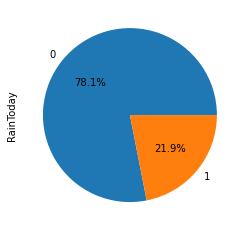

In [15]:
dataset['RainToday'].value_counts().plot.pie(autopct='%1.1f%%')

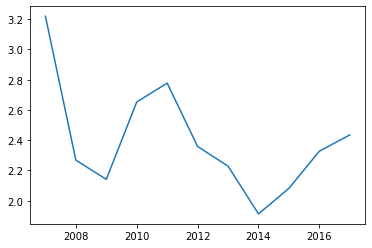

In [16]:
plt.plot(gb['Rainfall'].mean())

Text(0.5, 0, 'year')

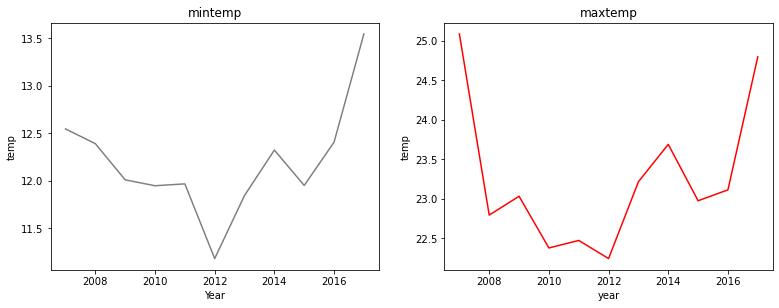

In [17]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title('mintemp')
plt.plot(gb['MinTemp'].mean(), label="mintemp", color='gray')
plt.ylabel('temp')
plt.xlabel('Year')

plt.subplot(2, 3, 2)
plt.title('maxtemp')
plt.plot(gb['MaxTemp'].mean(), label="maxtemp", color='red')
plt.ylabel('temp')
plt.xlabel('year')

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

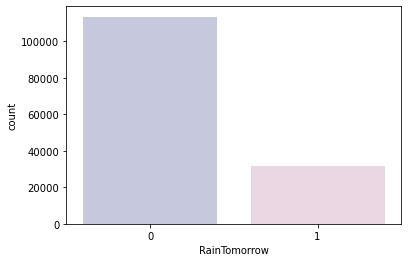

In [18]:
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= dataset["RainTomorrow"], palette= cols)

<AxesSubplot:xlabel='RainToday', ylabel='count'>

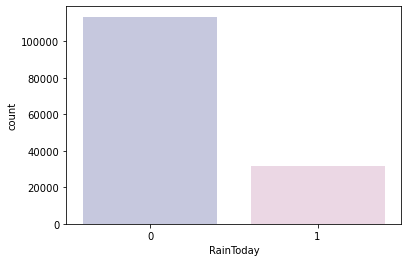

In [19]:
sns.countplot(x= dataset["RainToday"], palette= cols)

#### Correlazione tra i dati

Annulliamo i valori sulla diagonale per rendere corretta la lettura della correlazione.

In [20]:
corr = dataset.corr().replace(1,0)

<AxesSubplot:>

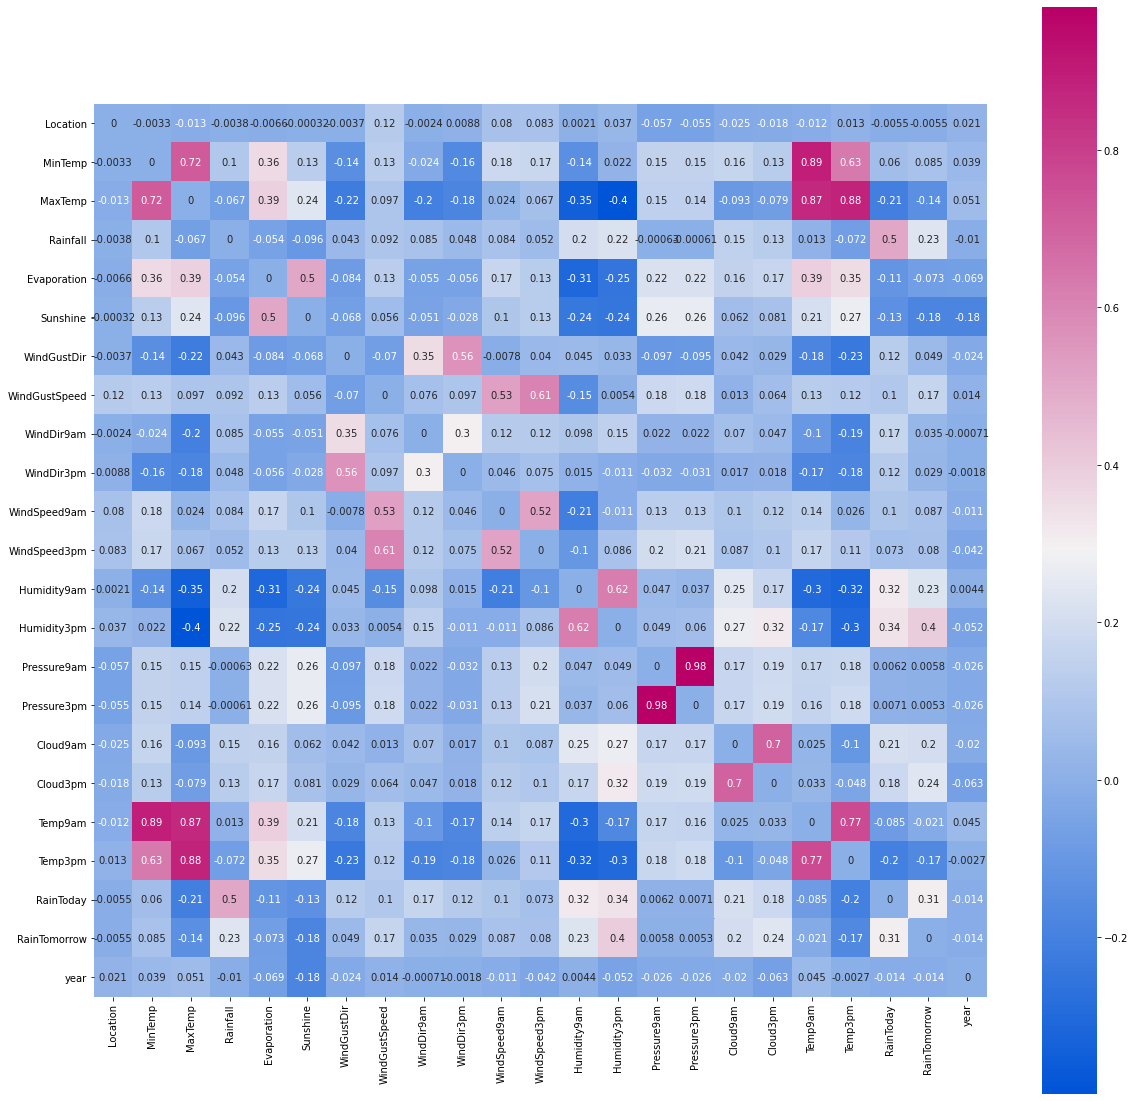

In [21]:
cmap = sns.diverging_palette(260,-10,s=100, l=40, n=6, as_cmap=True)
plt.subplots(figsize=(20,20))
sns.heatmap(corr,cmap= cmap,annot=True, square=True)

In [22]:
corrRainTomorrow = corr['RainTomorrow']

In [23]:
corrRainTomorrow.max(), corrRainTomorrow.index[corrRainTomorrow.argmax()]

(0.3979514149519119, 'Humidity3pm')

Possiamo individuare che la correlazione maggiore sulla viariabile RainTomorrow è 'Humidity3pm'.

## Selezione feature rilevanti

Ai fini dell'elaborazione dei dati del dataframe possiamo notare che abbiamo ancora delle feature non rilevanti; infatti eliminiamo la feature year, in quanto utile soltanto per la rappresentazione dei dati. 

Per poi successivamente suddividere il dataset in:
1. y, come la variabile da predirre.
2. X, come dataset delle feature.

In [24]:
X = dataset.drop(['year', 'RainTomorrow'], axis=1)

y = dataset['RainTomorrow']

Durante l'analisi dei dati abbiamo potuto notare che esiste uno sbilanciamento trai valori di RainToday quindi applichiamo la funzione SMOTE per equalizzare i pesi delle classi.

In [25]:
from sklearn.model_selection import train_test_split

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

Suddividiamo ora il dataset per ottenere una miglior predizione e prestazione, grazie alla ridotta quantità di dati utilizata, in training set e validation set.

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=1/3, random_state=42)

## Creazione ed addestramento dei modelli

Addestiamo ora Perceptron, standardizzando i suoi dati con StandardScaler, utilizzando il metodo fit.

### Perceptron

In [27]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Perceptron with standard scaler
std_perceptron = Pipeline([
    ('std', StandardScaler()),
    ('perceptron', Perceptron(max_iter=5000, tol=1e-3, early_stopping=True, alpha=0.0001, n_jobs=-1))
])

std_perceptron.fit(X_train, y_train)
print('Accuratezza sul trainining: {:.2f}%'.format(std_perceptron.score(X_train, y_train)*100))
print('Accuratezza sul validation: {:.2f}%'.format(std_perceptron.score(X_val, y_val)*100))

Accuratezza sul trainining: 70.51%
Accuratezza sul validation: 70.44%


In [28]:
def best_params(model):
    print('Parametri migliori:', model.best_params_)  
    print('Miglior train score: {:.4f}%\nMiglior validation score: {:.4f}%'.format(round(model.best_score_ * 100, 4), round(model.score(X_val, y_val)*100, 4)))

Nella cella seguente mostriamo la differenza di accuratezza utilizzando una GridSearch per determinare i parametri migliori:

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

std_perceptron = Pipeline([
    ('std', StandardScaler()),
    ('perceptron', Perceptron(max_iter=5000, n_jobs=-1, early_stopping=True, n_iter_no_change=5))
])

parameters = {
    'std': [None, StandardScaler()],
    'perceptron__penalty': [None, 'l1', 'l2', 'elasticnet'],
    'perceptron__alpha': [0.0001, 0.001, 0.01, 1],
    'perceptron__tol': [1e-9, 1e-6, 1e-3, 1, 1e3, 1e6],
}

perceptron_cv = GridSearchCV(std_perceptron, parameters, cv=5, n_jobs=-1, scoring='f1')
perceptron_cv.fit(X_train, y_train)
best_params(perceptron_cv)

Parametri migliori: {'perceptron__alpha': 0.001, 'perceptron__penalty': 'l1', 'perceptron__tol': 1, 'std': None}
Miglior train score: 71.3441%
Miglior validation score: 14.1580%


Possiamo notare che utilizzando la GridSearch su Perceptron, esso individua come miglior parametro il non utilizzo della standardizzazione, ma cio causa overfitting nel risultato. Quindi nei prossimi modelli standaridizziamo sempre i dati per evitare altri casi di overfitting.

Successivamente valutiamo, attraverso la Confiusion Matrix, la qualità delle previsioni del modello.

In [29]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

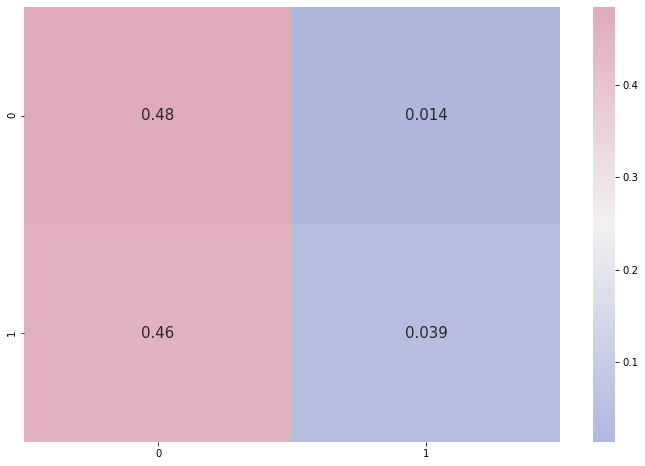

In [30]:
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))

cf_matrix = confusion_matrix(y_val, perceptron_cv.predict(X_val))
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [31]:
from sklearn.metrics import classification_report

pred = perceptron_cv.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.51      0.97      0.67     37699
           1       0.74      0.08      0.14     38023

    accuracy                           0.52     75722
   macro avg       0.62      0.53      0.41     75722
weighted avg       0.63      0.52      0.40     75722



Dalle statistiche della cella precedente possiamo determinare: 
1. <b>precision</b>: è la percentuale delle previsioni positive corrette (TP) sul totale delle previsioni positive del     modello (giuste TP o sbagliate FP).

    $$ P R = \frac{T P} {T P + F P}$$ <br>
    
2. <b>recall o sensitivity</b>: la percentuale delle previsioni positive corrette (TP) sul totale delle istanze positive (i positivi TP ed i falsi negativi FN), varia da 0 a 1.

    $$ R e c a l l =\frac{T P} {T P + F N} $$ <br>
    
3. <b>f1-score</b>: media armonica delle metriche Precision e Recall.

    $$ F S = \frac{2 ⋅ R e c a l l ⋅ P r e c i s i o n}{ R e c a l l + P r e c i s i o n}$$ <br>

## Perceptron con Polynomial Features

In [31]:
from sklearn.preprocessing import PolynomialFeatures

poly_perceptron = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('std', StandardScaler()),
    ('perceptron', Perceptron(n_jobs=-1, early_stopping=True, n_iter_no_change=5))
])

parameters = {
    'perceptron__penalty': ['l1', 'l2'],
    'perceptron__alpha': [0.0001, 0.001, 0.01],
    'perceptron__tol': [1e-9, 1e-6, 1e-3, 1],
}

poly_perceptron_cv = GridSearchCV(poly_perceptron, parameters, cv=5, n_jobs=-1, scoring='f1')
poly_perceptron_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('std', StandardScaler()),
                                       ('perceptron',
                                        Perceptron(early_stopping=True,
                                                   n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'perceptron__alpha': [0.0001, 0.001, 0.01],
                         'perceptron__penalty': ['l1', 'l2'],
                         'perceptron__tol': [1e-09, 1e-06, 0.001, 1]},
             scoring='f1')

In [32]:
best_params(poly_perceptron_cv)

Parametri migliori: {'perceptron__alpha': 0.0001, 'perceptron__penalty': 'l1', 'perceptron__tol': 1e-09}
Miglior train score: 73.6215%
Miglior validation score: 74.6864%


<AxesSubplot:>

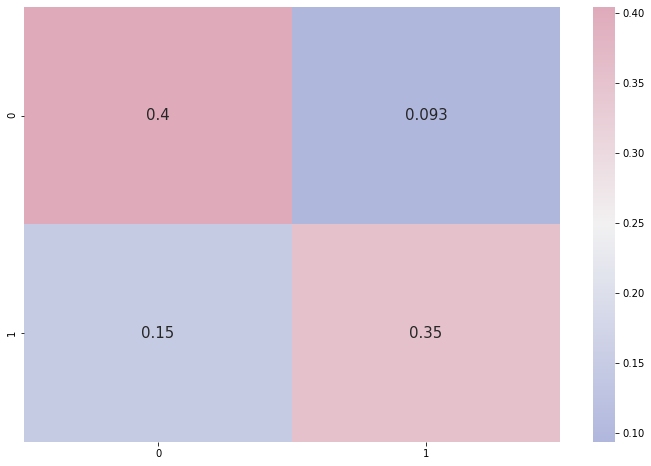

In [35]:
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_val, poly_perceptron_cv.predict(X_val))
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

Determiniamo l'intervallo di confinfidenza, cioè stimiamo l'intervallo di valori probabili per un determinato parametro. 

In [36]:
pd.Series(poly_perceptron_cv.best_estimator_[2].coef_[0]).nlargest(3) 

4     523.852118
16    357.948891
15    229.482111
dtype: float64

L'aggiunta di features polinomiale peggiora lo stato del modello, possiamo osservare che le features importanti per il modello sono una combinazione delle features originali, per cui, esse non determinano un miglioramento della valutazione semantica del modello.

In [37]:
pred_perceptron = poly_perceptron_cv.predict(X_val)

### Logistic Regression

Utilizziamo ora la Regressione Logistica per determinare la probabilità di 'RainTomorrow', attraverso una trasformazione logit sulla probabilità. 

In [38]:
from sklearn.linear_model import LogisticRegression

standard_logisticregression = Pipeline([
    ('std', StandardScaler()),
    ('lr', LogisticRegression(dual=False))
])

parameters = {
    'lr__tol': [1e-9, 1e-6, 1e-3, 1e-2, 1e-1, 1],
    'lr__C': [1, 0.8, 0.3],
    'lr__solver': ['liblinear', 'saga']
}

logisticregression_with_gridsearch = GridSearchCV(standard_logisticregression, parameters, cv=5, n_jobs=-1, scoring='f1')
logisticregression_with_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('std', StandardScaler()),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': [1, 0.8, 0.3],
                         'lr__solver': ['liblinear', 'saga'],
                         'lr__tol': [1e-09, 1e-06, 0.001, 0.01, 0.1, 1]},
             return_train_score=True, scoring='f1')

In [39]:
best_params(logisticregression_with_gridsearch)

Parametri migliori: {'lr__C': 0.3, 'lr__solver': 'saga', 'lr__tol': 1}
Miglior train score: 75.1736%
Miglior validation score: 74.7953%


Cerchiamo le Features maggiormente rilevanti per determinare RainTomorrow.

In [40]:
pd.Series(logisticregression_with_gridsearch.best_estimator_[1].coef_[0], index=X_train.columns).nlargest(3)

Humidity3pm      0.859239
WindGustSpeed    0.628498
MinTemp          0.491715
dtype: float64

Possiamo infatti notare che, come già visto in precedenza, una delle feature più determinanti è l'umidità alle 3 di pomeriggio del giorno prima; ma anche la velocità del vento influenza la nostra variabile target, dato che il vento permette lo spostamento delle nuvole e modifica la probabilità di pioggia in una determinata locazione geografica.
Infine anche la temperatura massima influenza la probabilità di pioggia.

<AxesSubplot:>

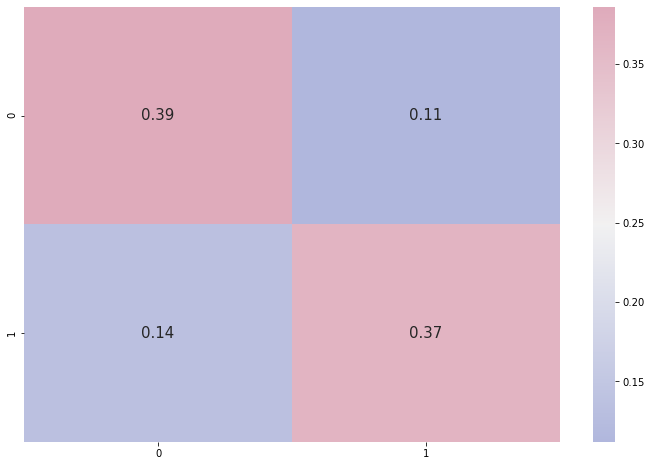

In [41]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_val, logisticregression_with_gridsearch.predict(X_val))
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [42]:
predLogisticRegression = logisticregression_with_gridsearch.predict(X_val)

## Cross-Validation con Stratified k-fold

Utilizziamo Stratified K fold in quanto ci permette di ottenedere la stessa proporzione ai dati.

In [43]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(3, shuffle=True, random_state=42)

for train, val in skf.split(X_train, y_train):
    print(y_train.iloc[val].value_counts())

0    25295
1    25187
Name: RainTomorrow, dtype: int64
0    25295
1    25186
Name: RainTomorrow, dtype: int64
0    25294
1    25187
Name: RainTomorrow, dtype: int64


## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc = Pipeline([
    ('std', StandardScaler()),
    ('rfc', RandomForestClassifier(n_jobs=-1, random_state=3))
])

parameters = {
    'rfc__n_estimators': [100, 200],
    'rfc__max_depth': range(2,10,2),
    'rfc__min_samples_leaf': range(1,5),
    'rfc__min_samples_split': [2, 5, 10],
}
    

random_forest_with_gridsearch = GridSearchCV(rfc, parameters, cv=skf, n_jobs=-1, scoring='f1')
random_forest_with_gridsearch.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std', StandardScaler()),
                                       ('rfc',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=3))]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': range(2, 10, 2),
                         'rfc__min_samples_leaf': range(1, 5),
                         'rfc__min_samples_split': [2, 5, 10],
                         'rfc__n_estimators': [100, 200]},
             return_train_score=True, scoring='f1')

In [45]:
best_params(random_forest_with_gridsearch)

Parametri migliori: {'rfc__max_depth': 8, 'rfc__min_samples_leaf': 4, 'rfc__min_samples_split': 10, 'rfc__n_estimators': 200}
Miglior train score: 81.6164%
Miglior validation score: 81.4584%


<AxesSubplot:>

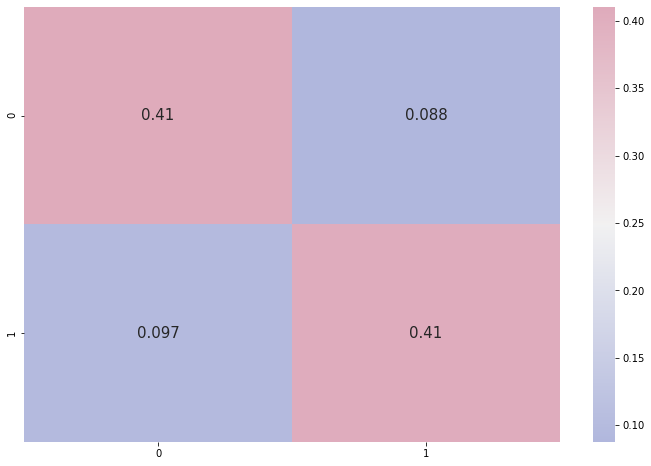

In [46]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_val, random_forest_with_gridsearch.predict(X_val))
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [47]:
rfc_imp = pd.Series(random_forest_with_gridsearch.best_estimator_[1].feature_importances_, index=X_train.columns).nlargest(3)
print(rfc_imp)

Humidity3pm    0.276585
Rainfall       0.214986
Sunshine       0.101031
dtype: float64


In [48]:
predRandomForest = random_forest_with_gridsearch.predict(X_val)

## XGBOOST 

In [49]:
from xgboost import XGBClassifier

std_xgb = Pipeline([
    ('std', StandardScaler()),
    ('xgb', XGBClassifier(objective='binary:logistic'))
])

parameters = {
    'xgb__eta': [0.001, 0.01, 1],
    'xgb__max_depth': [2,4],
    'xgb__n_estimators': [150, 300],
    'xgb__alpha': [0.0001, 0.001, 0.01, 1]
}

xgboost_gridsearch = GridSearchCV(std_xgb, parameters, cv=skf, n_jobs=-1, scoring='f1')
xgboost_gridsearch.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:29:50] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std', StandardScaler()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None,
                                                      reg_alpha=None,
                                                      reg_lambda=None,
                                                      scale_pos_weight=None,
                                                      subsample=None,
                                                      tree_method=None,
                                                      validate_parameters=None,
                                                      verbosity=None))]),
             n_jobs=-1,
             param_grid={'xgb__alpha': [0.0001, 0.001, 0.01, 1],
                         'xgb__eta': [0.001, 0.01, 1], 'xgb__max_depth': [2, 4],
                         'xgb__n_estimators': [150, 300]},
             return_train_score=True, scoring='f1')

In [50]:
best_params(xgboost_gridsearch)

Parametri migliori: {'xgb__alpha': 1, 'xgb__eta': 1, 'xgb__max_depth': 2, 'xgb__n_estimators': 300}
Miglior train score: 90.0982%
Miglior validation score: 90.0051%


<AxesSubplot:>

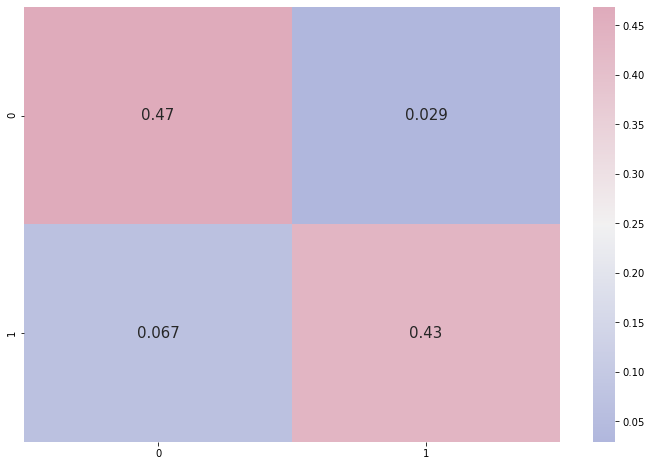

In [51]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_val, xgboost_gridsearch.predict(X_val))
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [52]:
xgb_imp = pd.Series(xgboost_gridsearch.best_estimator_[1].feature_importances_, index=X_train.columns).nlargest(3)
print(xgb_imp)

Rainfall       0.193258
Humidity3pm    0.191329
Cloud9am       0.112168
dtype: float32


In [53]:
predXGBoost = xgboost_gridsearch.predict(X_val)

## SVM 

In [54]:
from sklearn.svm import SVC

std_svm = Pipeline([
    ('std', StandardScaler()),
    ('svm', SVC())
])

parameters = {
    'svm__kernel': ['rbf', 'linear'],
    'svm__C': [0.01, 0.1, 1],
}

svm_withgridsearch = GridSearchCV(std_svm, parameters, cv=skf, n_jobs=-1, scoring='f1')
svm_withgridsearch.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std', StandardScaler()),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.01, 0.1, 1],
                         'svm__kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='f1')

In [55]:
best_params(svm_withgridsearch)

Parametri migliori: {'svm__C': 1, 'svm__kernel': 'rbf'}
Miglior train score: 81.6563%
Miglior validation score: 82.0445%


<AxesSubplot:>

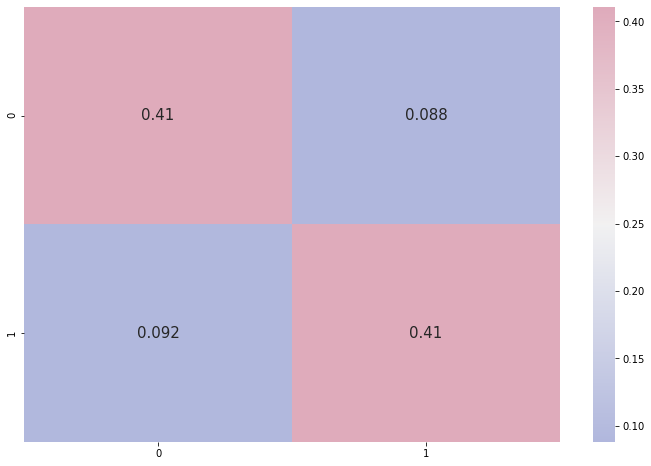

In [56]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_val, svm_withgridsearch.predict(X_val))
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [57]:
svm_imp = pd.Series(svm_withgridsearch.best_estimator_[1].support_vectors_[0], index=X_train.columns).nlargest(3)
print(svm_imp)

RainToday     1.675308
Location      1.163442
WindDir3pm    0.510298
dtype: float64


Dalla cella precedente, possiamo notare che SVM ha individuato che la velocità della raffica di vento più forte indice sulla probiabilità che possa piovere. 

In [58]:
predSVM = svm_withgridsearch.predict(X_val)

### Comparazione dei modelli

Perceptron, Logistic Regresion RandomForesti e XGBOOST hanno individuato che la percentuale di umidità alle 3pm influenza la probabilità di pioggia, come abbiamo stimato tramite lo studio della correlazione tra le variabili del dataset; mentre per SVM il primo parametro che influenza la probabilità è WindGustSpeed

Riportiamo qui sotto i dati statici per ciascun modello: 
1. Perceptron:

In [59]:
print(classification_report(y_val, pred_perceptron))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77     37699
           1       0.79      0.71      0.75     38023

    accuracy                           0.76     75722
   macro avg       0.76      0.76      0.76     75722
weighted avg       0.76      0.76      0.76     75722



2. LogisticRegression: 

In [60]:
print(classification_report(y_val, predLogisticRegression))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76     37699
           1       0.77      0.73      0.75     38023

    accuracy                           0.75     75722
   macro avg       0.75      0.75      0.75     75722
weighted avg       0.75      0.75      0.75     75722



3. Random Forest:

In [61]:
print(classification_report(y_val, predRandomForest))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82     37699
           1       0.82      0.81      0.81     38023

    accuracy                           0.82     75722
   macro avg       0.82      0.82      0.82     75722
weighted avg       0.82      0.82      0.82     75722



4.XGBoost:

In [62]:
print(classification_report(y_val, predXGBoost))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     37699
           1       0.94      0.87      0.90     38023

    accuracy                           0.90     75722
   macro avg       0.91      0.90      0.90     75722
weighted avg       0.91      0.90      0.90     75722



5. SVM:

In [63]:
print(classification_report(y_val, predSVM))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     37699
           1       0.82      0.82      0.82     38023

    accuracy                           0.82     75722
   macro avg       0.82      0.82      0.82     75722
weighted avg       0.82      0.82      0.82     75722



In conclusione possiamo dedurre, analizzando i dati delle statistiche sopra riportate, che il modello più adeguato per predirre la nostra variabile target 'RainTorrow', cioè la variabile 1, è: XGBOOST. 